In [19]:
import pandas as pd
import numpy as np
import csv
import powerlaw
from numba import njit
import matplotlib.pyplot as plt

In [15]:
# @njit
def conn_matrix_power(n):
    """Returns nxn symmatric matrix for J with random numbers in [0,1]."""
    distribution = powerlaw.Power_Law(xmin = 18991,parameters =[4], size = (n,n))
    s = distribution.generate_random(n*n)
    J_tri = np.tril(np.reshape(s, (n,n)), -1)
    J = np.zeros((n,n)) + J_tri + J_tri.T
    J_log = np.log(J)
    J_norm = J_log/np.max(J_log)
    J_norm[np.isinf(J_norm)] = 0
    return J_norm

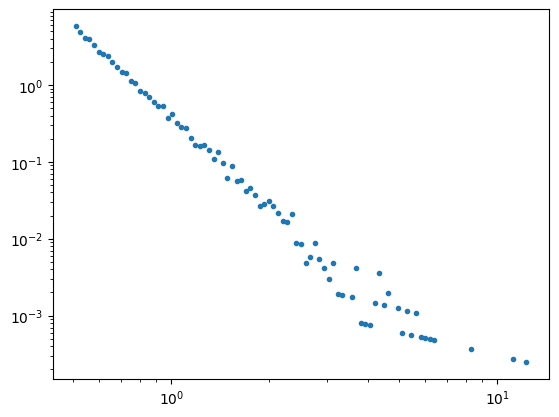

In [45]:
a, xmin = 4, 0.5
N = 10000

# generates random variates of power law distribution
vrs = powerlaw.Power_Law(xmin=xmin, parameters=[a]).generate_random(N)

# plotting the PDF estimated from variates
bin_min, bin_max = np.min(vrs), np.max(vrs)
bins = 10**(np.linspace(np.log10(bin_min), np.log10(bin_max), 100))
counts, edges = np.histogram(vrs, bins, density=True)
centers = (edges[1:] + edges[:-1])/2.

# # plotting the expected PDF 
# xs = np.linspace(bin_min, bin_max, 100000)
# plt.plot(xs, [(a-1)*xmin**(a-1)*x**(-a) for x in xs], color='red')
plt.plot(centers, counts, '.')

plt.xscale('log')
plt.yscale('log')

plt.savefig('powerlaw_variates.png')

In [5]:
# Reading in participant numbers
file = open("ids.txt", "r")
ids = file.read()
ids_list = ids.split("\n")


['153025', '108828', '149337', '105115', '151223', '147737', '151627', '140925', '123925', '211720', '128127', '122620', '161731', '188347', '126325', '144832', '123117', '103818', '114419', '414229', '138534', '196750', '129028', '103414', '190031', '198451', '151526', '101107', '124422', '148840', '221319', '100408', '116524', '105014', '366446', '131217', '857263', '111312', '178950', '111716', '128632', '118730', '149741', '159340', '113922', '135932', '192540', '127933', '280739', '208226', '176542', '499566', '154734', '148335', '136833', '239944', '118932', '245333', '160123', '672756', '110411', '899885', '211417', '118528', '162733', '122317', '214423', '212318', '125525', '120111', '130316', '856766', '133019', '101915', '654754', '751348', '101309', '133928', '131722', '298051', '100307', '149539', '130013', '127630', '117122', '201111', '189450', '115320', '792564', '135225', '146432', '106016', '397760', '113619', '163129', '156637', '139637', '756055', '199655']


In [71]:
def remove_rois(df):
    """ Remove the brain regions that don't belong to the AAL atlas"""
    df = df.iloc[:, :-26]
    df = df.iloc[:-26]
    return df

In [70]:
def normalize(df):
    """ Use log normalization to normalize the dataframe between 0 and 1"""
    df_log = np.log(df)
    df_log.replace([np.inf, -np.inf], 0, inplace=True)
    df_log /= df_log.max()
    return df_log

### Make average file of fMRI matrices 

In [68]:
# Average fMRI
with open('fMRI_connectivity_matrix_99_HCP/'+ids_list[0] + '_functional_connectivity.txt', 'r') as file:
    reader = csv.reader(file, delimiter=',')
    data = list(reader)
fMRI = pd.DataFrame(data, dtype = 'float64')

# Remove columns
fMRI = remove_rois(fMRI)
fMRI_avg = fMRI.values

for i in range(1, len(ids_list)):
    with open('fMRI_connectivity_matrix_99_HCP/'+ids_list[i] + '_functional_connectivity.txt', 'r') as file:
        reader = csv.reader(file, delimiter=',')
        data = list(reader)
    fMRI = pd.DataFrame(data, dtype = 'float64')

    # Remove columns
    fMRI = remove_rois(fMRI)
    fMRI_avg += fMRI.values
    
fMRI_avg /= len(ids_list)
np.savetxt('fMRI_avg.csv', fMRI_avg, delimiter=',')

### Normalize DTI matrices and make an average file

In [66]:
# Read in file
DTI = pd.read_csv('structural_connectivity_99/'+ids_list[0] + '_structural_connectivity.txt',sep='\t',header=1)
DTI = DTI.set_index('data.1')

# Remove rows and columns
DTI = DTI.drop(['data', 'Unnamed: 118'], axis=1)
DTI = remove_rois(DTI)

# Log normalization
# DTI_log = normalize(DTI)

DTI_avg = DTI.values

for i in range(1, len(ids_list)):
    # Read in file
    DTI = pd.read_csv('structural_connectivity_99/'+ids_list[i] + '_structural_connectivity.txt',sep='\t',header=1)
    DTI=DTI.set_index('data.1')

    # Remove rows and columns
    DTI = DTI.drop(['data', 'Unnamed: 118'], axis=1)
    DTI = remove_rois(DTI)

    # Log normalization
    # DTI_log = normalize(DTI)

    DTI_avg += DTI.values

DTI_avg = DTI_avg / len(ids_list)

np.savetxt('DTI_avg.csv', DTI_avg, delimiter=',')


/opt/anaconda3/envs/sc/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/anaconda3/envs/sc/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/anaconda3/envs/sc/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/anaconda3/envs/sc/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/anaconda3/envs/sc/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/anaconda3/envs/sc/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divid